# Gender differences in parliamentary speeches
There is a long tradition of studying legislative decision-making and behaviour within political science. This field contains both qualitative and quantitative studies. The latter includes for example roll call analyses (e.g. Poole & Rosenthal 1985). Another strand of this literature takes the individual characteristics of the members of parliament (MP's), such as gender, into account. Even if many gaps remain, some research have contributed to a better understanding of this aspect (for an overview, see Mazur & Pollack 2009). A recent article by Bäck et al. (2014) uses data from the Swedish parliament (the *Riksdag*) to study whether the gender of the MP has any impact on his or her presence on the floor. They find that female MP's in general deliver fewer speeches and that this pattern results from debates dealing with what they label "hard" policy issues. The labelling follows Wängnerud (1998) and include policy areas such as macroeconomics, energy, transportation, banking, finance, commerce, and technology as "hard". Education, health, labor market, and immigration are defined as "soft" policy areas.

In this short analysis, I will tackle a related question using similar data. I will evaluate if it is possible to determine the gender of the MP by analyzing their speeches, without taking any other characteristics into account. This will be carried out using text analysis of speeches in the Swedish parliament during one year, from autumn 2014 to summer 2015. As a part of the analysis, I will also get information about what words are most informative when it comes to determine gender from parliament speeches.

The Swedish parliament constitutes a case of particular interest since it has one of the highest shares of female MP's in the world (IPU 2015). After the election in 2014, 43.6 percent of the MP's were female. The Swedish parliament could therefore be seen as a less-likely case; if it possible to determine gender of the Swedish MP's based on their speeches given in the parliament, it is likely to be possible to do the same in another context.

Since this is an assignment as a part of the course *Collecting and Analyzing Big Data*, at Oslo Summer School in Comparative Social Science Studies 2017, the presentation here is more focused on the different steps in the data processing and analysis, than on previous literature and theoretical framework. It is possible that I will try to take this analysis further later on and write a paper based on the results of such an analysis. 

### Data material
In democratic societies, the political debates in the parliament are central to the political decision process. In those debates, members of the different political parties make speeches to address political issues and present their views. The speeches held are often written down in detail in parliamentary protocols. This formal context and the importance of political speeches make parliamentary data often easily available, of high quality, and valuable for analyses. It is therefore not surprising, that analysis of political text has a long tradition in political science. Textual documents and debates are often the media of expressing and communicating political ideas and thoughts (Grimmer & Stewart 2013). This field of research also includes analyses using statistical methods and in more recent years those analyses take advantage of the development of text analyses wihtin the statistical community (e.g. Quinn et al. 2010; King et al. 2017).

In this analysis, I will use parliamentary debates that took place in the Swedish parliament in autumn 2014 and spring 2015, i.e. the parliament year 2014/15. The Swedish parliament have made this data availabel through their [open data website](https://data.riksdagen.se/). It is possible to retrieve the data through an API with XML files, but they urge those who want data from whole parliamant years to download prepared data instead. I have therefore downloaded the speeches from the parliament year 2014/15 as a csv file. Unfortunately, some columns containing text data also included quotation marks, which caused an error when trying to read the data into Python using Panda. In order to handle this, I have removed the few speeches causing this problem using R. 

First, a few relevant modules are imported into Python. Then the csv file with parliament speeches is imported as a Panda data frame.

In [235]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [236]:
speeches_df = pd.read_csv('https://raw.githubusercontent.com/richardohrvall/oslo_bigdata/master/speeches_201415.csv', 
                          encoding = 'utf-8')

It is valuable to first take a look at the characteristics of different variables in the data frame. As will be discussed later on, the Swedish language contain some specific characters. The data frame has 13 variables and 13,013 observations, i.e. speeches.

In [237]:
speeches_df.apply(lambda x: pd.lib.infer_dtype(x.values))

dok_id              unicode
dok_rm              unicode
dok_nummer          integer
dok_datum           unicode
avsnittsrubrik      unicode
kammaraktivitet       mixed
anforande_nummer    integer
talare                mixed
parti                 mixed
anforandetext         mixed
intressent_id         mixed
rel_dok_id            mixed
replik                mixed
dtype: object

In [308]:
speeches_df.shape

(13013, 13)

In [238]:
speeches_df.head()

,dok_id,dok_rm,dok_nummer,dok_datum,avsnittsrubrik,kammaraktivitet,anforande_nummer,talare,parti,anforandetext,intressent_id,rel_dok_id,replik
0,H2091,2014/15,1,2014-09-29T00:00:00Z,Hälsningsanförande från ålderspresidenten,NaN,1,Per Westerberg (M),M,Hälsningsanförande från ålderspresidenten Ära...,031005479013,NaN,N
1,H2091,2014/15,1,2014-09-29T00:00:00Z,Val av talman,val,2,Mikael Damberg (S),S,Herr ålderspresident! Att vara talman i Sverig...,014744660015,NaN,N
2,H2091,2014/15,1,2014-09-29T00:00:00Z,Val av talman,val,3,Anna Kinberg Batra (M),M,Herr ålderspresident! Ärade ledamöter av Sveri...,012053331219,NaN,N
3,H2091,2014/15,1,2014-09-29T00:00:00Z,Val av förste vice talman,val,4,Anna Kinberg Batra (M),M,Herr ålderspresident! Som företrädare för Alli...,012053331219,NaN,N
4,H2091,2014/15,1,2014-09-29T00:00:00Z,Val av andre vice talman,val,5,Mattias Karlsson (SD),SD,Val av andre vice talman Herr ålderspresident...,0831636664429,NaN,N


As mentioned, each observations in the data frame is a speech. The actual speech can be found in the variable 'anforandetext'. An example, speech number 50 in the data frame, is presented below. It addresses a crises in a part of Sweden and the need for the country to prepare for coming crises, especially crises related to the climate.

In [239]:
sample_speech = speeches_df['anforandetext'][50]
print(sample_speech)

Herr talman! Vi ska naturligtvis göra allt som står i vår makt för att möta de höga förväntningar som finns på regeringen. Naturligtvis måste vi också klara att dra de nödvändiga slutsatserna av det som hände i Västmanland och se till att samhället står bättre rustat inför nästa påfrestning.  Jag tror nämligen att vi kan vara helt övertygade om - även om vi alla givetvis hoppas på motsatsen - att samhället kommer att ställas inför stora påfrestningar och nya kriser. Inte minst visar den klimatutmaning vi har framför oss och den sårbarhet som finns på grund av den att vi måste skärpa vår beredskap för kriser och katastrofer.


### Add information about gender
Even if the data frame has 13 different variables, none of them contain the information of the MP's gender. One variable, however, is a unique indvidual id &mdash; 'intressent_id'. This variable can be used to add information about gender. Another file provided by the Swedish parliament on their open data website contain both information abouth gender and the unique indvidual id. I read this csv file as a Pand data frame, but I only keep those two variable of interest. The variable 'kön' contains information about gender where 'kvinna' is female and 'man' is male.

In [240]:
pinfo_df = pd.read_csv('https://raw.githubusercontent.com/richardohrvall/oslo_bigdata/master/Sagtochgjort.csv', usecols = [0,2])

In [241]:
pinfo_df.head()

,id,kön
0,"﻿""0747852417614""",kvinna
1,0116084827614,man
2,0772402807013,man
3,0747852417614,kvinna
4,0772402807013,man


As seen below, the number of observations in the data frame is 177,161. The number of MP's in the Swedish parliament, however, is only 349. The data frame is much bigger because it contains MP's from several terms, and also becuase it has numerous duplicates in terms of id and gender. When the duplicates are dropped, the number of observations is reduced to only 649. 

In [242]:
pinfo_df.count()

id     177161
kön    177161
dtype: int64

In [243]:
pinfo_df.columns = ['intressent_id', 'sex']

pinfo_df = pinfo_df.drop_duplicates()
pinfo_df.count()

intressent_id    649
sex              649
dtype: int64

In the next step, the data frame with information about gender is matched to the data frame with speeches. Since only speeches with information about gender is of interest for the analysis, this is carried out by a so-called inner join, i.e. only observations with speeches *and* information about gender are kept.  

In [244]:
poltext_df = pd.merge(speeches_df, pinfo_df, on='intressent_id', how='inner')

In [245]:
poltext_df.tail()

,dok_id,dok_rm,dok_nummer,dok_datum,avsnittsrubrik,kammaraktivitet,anforande_nummer,talare,parti,anforandetext,intressent_id,rel_dok_id,replik,sex
12840,H20990,2014/15,90,2015-04-22T00:00:00Z,Mineralpolitik,ärendedebatt,19,Hanna Westerén (S),S,Herr ålderspresident! Anledningen till att jag...,0412148992926,H201NU14,N,kvinna
12841,H20990,2014/15,90,2015-04-22T00:00:00Z,Mineralpolitik,ärendedebatt,21,Hanna Westerén (S),S,Herr ålderspresident! Till att börja med vill ...,0412148992926,H201NU14,Y,kvinna
12842,H20990,2014/15,90,2015-04-22T00:00:00Z,Mineralpolitik,ärendedebatt,23,Hanna Westerén (S),S,Herr ålderspresident! Jag var lite tveksam om ...,0412148992926,H201NU14,Y,kvinna
12843,H20991,2014/15,91,2015-04-23T00:00:00Z,Frågestund,frågestund,34,Jennie Åfeldt (SD),SD,Herr talman! Min fråga går till socialförsäkri...,0787535945527,NaN,N,kvinna
12844,H20991,2014/15,91,2015-04-23T00:00:00Z,Frågestund,frågestund,36,Jennie Åfeldt (SD),SD,Herr talman! Jag tackar för svaret. Som redan ...,0787535945527,NaN,N,kvinna


In order to simplify the analysis, I create a new variable called 'female', which is a dummy variable that takes the value 1 if the MP is female and 0 otherwise. As seen, below the share of speeches given by women is 43.7 percent of the total number of speeches. This very close to the share of women among the MP's -- 43.6 percent. This differ from the analysis by Bäck et al. (2014) mentioned earlier. They found that women did not deliver as many speeches as men do. However, they used data from 2002 until 2010. It is possible that the share of speeches given by female MP's has increased over time. 

In [246]:
poltext_df['female'] = np.where(poltext_df['sex'] == 'kvinna', 1, 0)

In [309]:
print poltext_df['female'].value_counts()
print poltext_df['female'].value_counts(normalize = True)

0    7227
1    5618
Name: female, dtype: int64
0    0.562631
1    0.437369
Name: female, dtype: float64


### Clean and prepare data

Before shifting focus to the analyses, it is necessary to clean the data. I define a function that strip the speeches from some commands that are not part of texts delivered. The function also removes punctuation. The new variable with cleaned speeches is given the name 'clean_text'. How the first five observations of that variable look is presented below.  

In [248]:
import re

In [249]:
def clean_string(string):
    clean_string = string.replace('STYLEREF', '')
    clean_string = clean_string.replace('Kantrubrik', '')
    clean_string = clean_string.replace('MERGEFORMAT', '')
    clean_string = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', clean_string)
    return clean_string 

In [250]:
poltext_df['clean_text'] = poltext_df['anforandetext'].apply(clean_string)

In [251]:
poltext_df['clean_text'].head(5)

0    Hälsningsanförande från ålderspresidenten  Ära...
1    Herr talman Efter att ha varit ålderspresident...
2    Herr ålderspresident Att vara talman i Sverige...
3    Herr talman Jag tackar för Emil Källströms gra...
4    Herr talman Efter åtta år lämnar den borgerlig...
Name: clean_text, dtype: object

The corpus of speeches given in the Swedish parliament contain speeches from many different types of debates. The different types of debates can be seen from the variable 'kammaraktivitet', as shown below. Some of these debates consists of questions to the government or to the prime minister. They are of a specific nature and a few individuals give a large share of the speeches in those debates. I therefore subset the corpus, so that I only use the more conventional debates between different MP's. After that, the data frame is cleaned and prepared for analysis.

In [252]:
poltext_df['kammaraktivitet'].value_counts()

interpellationsdebatt         5063
ärendedebatt                  3347
frågestund                    1184
allmänpolitisk debatt          589
partiledardebatt               381
statsministerns frågestund     300
utrikespolitisk debatt         208
budgetdebatt                   188
aktuell debatt                 102
val                              9
ceremoni                         2
Name: kammaraktivitet, dtype: int64

In [253]:
poltext2_df = poltext_df[poltext_df['kammaraktivitet'].isin([u'ärendedebatt', 
                                                            u'allmänpolitisk debatt', u'partiledardebatt', 
                                                            u'utrikespolitisk debatt', u'budgetdebatt', 
                                                           u'aktuell debatt']) ]

## Analyses
In order to be able to evaluate different models, the data frame is devided into two parts &mdash; one for training and one for testing the models. The train data is defined to be 80 percent of the total data. Both the train and the test data are divided into two part: one (X) with the speeches and one (y) with information about the MP's gender.

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poltext2_df['clean_text'], 
                                                    poltext2_df['female'], 
                                                    train_size=0.8)

### Bag of words
As a first step, I estimate a model using a bag-of-words representation of the speeches. This means that the structure of the text is discarded, and only the count of how often a word appears in a speech is considered. In order to make such analyses, I first import a number of moduls into Python. I also use a set of so-called stopwords from the nltk corpus. This set includes words that are too frequent to be informative. 

In [260]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.corpus import stopwords
stop = set(stopwords.words('swedish'))

This bag-of-words representation is achieved by applying the transformer CountVectorizer to the train data. In this step I use the Swedish stopwords mentioned before. I also define that I only want words that at least appear in 1 percent of the speeches, but in less than half of the speeches. This because I do not want to include words that are very rare and could be interpreted as more informative than they really are, and I also do not want to include words that are very common and therefore not that informative. This results in a vocabulary of 2,343 words, as can be seen below.  

In [261]:
vector = CountVectorizer(min_df=.01, max_df=.5, stop_words = stop, encoding = 'utf-8', decode_error='ignore')

vector.fit(X_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding='utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=set([u'vart', u'vars', u'oss', u'vara', u'och', u's\xe5dant', u'alla', u'd\xe4r', u'hade', u's\xe5dana', u'allt', u'under', u'jag', u'har', u'vem', u'ditt', u'fr\xe5n', u'utan', u'de', u'mot', u'dina', u's\xe5dan', u'du', u'din', u'dig', u'sin', u'vilket', u'denna', u'v\xe5rt', u'mycket',...a', u'dessa', u'kan', u'detta', u'v\xe5ra', u'hans', u'dess', u'\xe4r', u'man', u'i', u'varf\xf6r']),
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [262]:
print("Vocabulary size: {}".format(len(vector.vocabulary_)))

Vocabulary size: 2343


For some reason the Swedish characters in the speeches are not handled correclty by the transformer. Below some of the words in the vocabulary is presented. The first word listed there is 'k\xe4rnkraften', but it should be 'kärnkraften'. I am not sure why this problem appears here when the Swedish characters where presented correctly in the data frame (I have tried specifying different encoding in the CountVectorizer without any success). However, this is not of any problem for the data analysis since the Swedish characters are presented in a consistent way.

In [265]:
vector.get_feature_names()[1101:1110]

[u'k\xe4rnkraften',
 u'k\xf6pa',
 u'k\xf6per',
 u'k\xf6r',
 u'k\xf6ra',
 u'lade',
 u'lades',
 u'lag',
 u'lagar']

I use the vocabulary to get a bag-of-words representation of the training data. Then I use this representation to estimate a logistic regression model where the dependent variable is the gender of the MP's. The accuracy score for this model is 97.6 percent, which is very high. And indeed, it turns out that the model overfit the data. When I split the training data into five parts and use each the five parts as testing data and the other four parts as training data, and calculate an average accuracy over these five estimates, I get a mean cross-validation accuracy of 65 percent. This is much lower than the earlier 98 percent. It is a bit higher than what we would get by chance -- if we assumed that all MP's were male we would be correct 54 percent of the time. Compared to this, 65 percent is better even if we are far from perfect prediction. 

In [266]:
X_train_vect = vector.transform(X_train)

In [277]:
lr = LogisticRegression()

lr.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [278]:
print accuracy_score(y_train, lr.predict(X_train_vect))
confusion_matrix(y_train, lr.predict(X_train_vect))


0.976116303219


array([[2152,   36],
       [  56, 1608]])

In [279]:
scores = cross_val_score(lr, X_train_vect, y_train, cv = 5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.65


It is also possible to test this model using the test data. This gives us an accuracy score of 68 percent, which is close to the previously mentioned cross-validation accuracy score.

In [280]:
Xtest_vect = vector.transform(X_test)
print accuracy_score(y_test, lr.predict(Xtest_vect))
confusion_matrix(y_test, lr.predict(Xtest_vect))

0.677050882658


array([[393, 149],
       [162, 259]])

The parameters in the logistic regression could be fine-tuned. Using the grid search, I try different values for the C parameter in the logistic regression model.  The C parameter controls the inverse of the regularization strength. As can be seen below, setting the C parameter to 0.01 instead of the default 1 gives a slightly improved cross-validation score. This improvement is very small, and when using the test data the accuracy scores are almost the same, but given that there is a risk of overfitting the model a lower C seems reasonable. 

In [281]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.68
('Best parameters: ', {'C': 0.01})


In [286]:
lr = LogisticRegression(C = 0.01)
lr.fit(X_train_vect, y_train)
print accuracy_score(y_test, lr.predict(Xtest_vect))
print confusion_matrix(y_test, lr.predict(Xtest_vect))

0.678089304258
[[428 114]
 [196 225]]


Even if the model is not predicting the gender of the MP's very well, it is still clearly better than what we would get by predicting randomly. Hence, the speeches do provide some information about the gender of the MP's. It is therefore of interest to see what words have the highest and lowest coefficients in the model, i.e. what words are most informative according to the model. The ten words that increases the likelihood of the MP being a female are: wonders, incredible, lives, women, health care, chooses, going on, opportunity, will, and foreign aid. Some of them seems reaonsable given earlier findings by Bäck et al. (2014) that women tend to speak more about "soft" policy issues. The word 'women' could be related to gender equality issues, and health care is labelled as a "soft" policy issue, and foreign aid could possibly be labelled the same way. If we look at the words that are associated with a higher likelihood of the MP begin a male, we find: the Liberal party, party, down, Swedish, competitiveness, wrong, discuss, Ulla (a Swedish name), problem, and party leader debate. The word 'competitiveness' is related to business and could be seen as part of "hard" policy issues, but the other words are more difficult to label. In the graph below, the top 20 words are illustrated, and there we find 'taxes' and 'airport' as well -- two words related to "hard" policy issues. Even if it is difficult to reach any clear conclusions, some of the words listed here are in line with what could be expected given the previous findings by Bäck et al. (2014).

In [287]:
coef_df = pd.DataFrame(lr.coef_).T
coef_df['word'] = list(vector.get_feature_names())

print(coef_df.sort_values(0, ascending=False).head(10))
print(coef_df.sort_values(0, ascending=True).head(10))

             0       word
2079  0.236371     undrar
1412  0.208050    oerhört
273   0.200458        bor
1095  0.173153    kvinnor
2265  0.152874     vården
2232  0.152445     väljer
1541  0.151337      pågår
1339  0.136425  möjlighet
2205  0.135066      vilja
266   0.133269  biståndet
             0              word
546  -0.196729       folkpartiet
1456 -0.170584             parti
1356 -0.154795               ned
1902 -0.153453           svenska
1042 -0.150230   konkurrenskraft
516  -0.146975               fel
386  -0.139437        diskuterar
2069 -0.138989              ulla
1524 -0.134499         problemet
1460 -0.124187  partiledardebatt


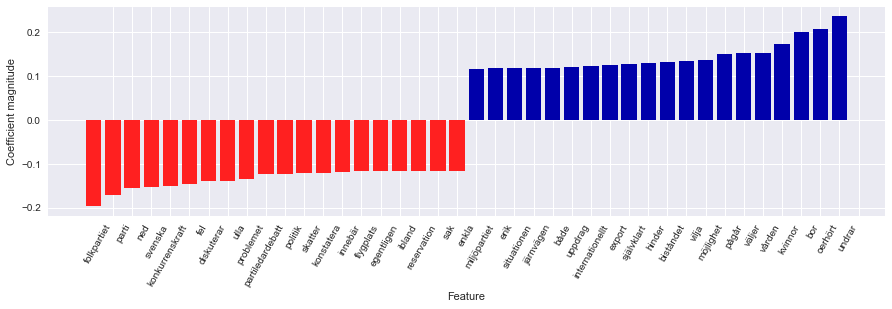

In [288]:
import mglearn

mglearn.tools.visualize_coefficients(
    lr.coef_, coef_df['word'], n_top_features = 20)

### Rescaling with tf-idf
In an attempt to improve the accuracy of the predictions, I will try a approach where the words in the speeches are rescaled by how informative they are expected to be. This is done using the *term frequency-inverse document frequency* method. This method gives a high weight to words that appear frequently in a specific speech, but do not appear in so many of the speeches. The weight of word $w$ in speech $d$ is given by the following formula, where $tf$ (term frequency) is number of times word $w$ appears in speech $d$ and $N_w$ is the number of speeches that contain the word $w$ and $N$ is the number of speeches in the corpus. 

${tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1$

In the converter, TfidfVectorizer, I also set that a word have to appear in 1 percent of the documents, and I exclude stopwords. The model is then estimated using logistic regression, and I try different levels of C in the same way as before. The cross-validation score is slightly improved to an average of 70 percent, and using the test data I get an accuracy score of 69 percent.

In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [290]:
pipe = make_pipeline(TfidfVectorizer(min_df=.01, stop_words = stop), 
                    LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.70
('Best parameters: ', {'logisticregression__C': 1})


In [300]:
tfidf_vect = TfidfVectorizer(min_df=.01,
                            stop_words = stop)
tfidf_vect.fit(X_train)
tfidf = tfidf_vect.transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)
lr_tfidf = LogisticRegression(C=1)
lr_tfidf.fit(tfidf, y_train)
print accuracy_score(y_test, lr_tfidf.predict(tfidf_test))
print confusion_matrix(y_test, lr_tfidf.predict(tfidf_test))

0.685358255452
[[438 104]
 [199 222]]


The words that the model consider to be most informative are to some extent the same as was seen in the earlier model. The words that seemed to be in line with previous findings that women debate "soft" policy issues more than men can be found here as well.

In [303]:
lr_tfidf.fit(tfidf, y_train)
coef_df = pd.DataFrame(lr_tfidf.coef_).T
coef_df['word'] = list(tfidf_vect.get_feature_names())
coef_df.sort_values(0, ascending=False).head(10)

,0,word
2085,2.452022,undrar
1414,2.229581,också
1416,2.222797,oerhört
1098,2.150819,kvinnor
213,1.730504,behöver
273,1.686235,bor
2272,1.608348,vården
266,1.517890,biståndet
2233,1.444162,väldigt
1281,1.402303,miljöpartiet


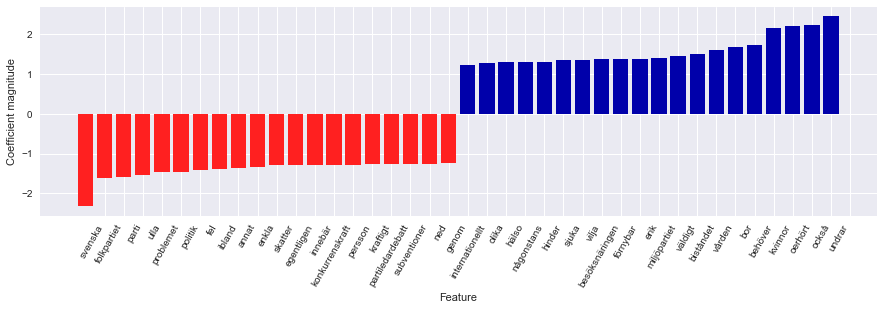

In [306]:
mglearn.tools.visualize_coefficients(
    lr_tfidf.coef_, coef_df['word'], n_top_features = 20)

### More than one word
So far the models estimated in the analysis only use individual words, without taking into account what words come before or after them. One way to use such information is to not only study individual words, but also pairs of words, *bigrams*, and triplets of words, *trigrams*. In a next step, I therefore estimate logistic regression models using single words, bigrams and trigram. I also test different levels of the C parameter in the logistic regression. The representation of the speeches are based on the tf-idf method as before.

As can be seen below, based on cross-validation the best accuracy is reached using both single words and bigrams, and the optimal C parameter is the default 1. However, the accuracy score is at par with the previous models. 

In [220]:
pipe = make_pipeline(TfidfVectorizer(min_df=.01,
                                    stop_words = stop), 
                     LogisticRegression())
#
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10],
                "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.69
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 2), 'logisticregression__C': 1}


In [221]:
pd.DataFrame(grid.cv_results_)[['param_tfidfvectorizer__ngram_range','mean_test_score']]

,param_tfidfvectorizer__ngram_range,mean_test_score
0,"(1, 1)",0.564382
1,"(1, 2)",0.564382
2,"(1, 3)",0.564382
3,"(1, 1)",0.564382
4,"(1, 2)",0.564382
5,"(1, 3)",0.564382
6,"(1, 1)",0.597871
7,"(1, 2)",0.594496
8,"(1, 3)",0.593718
9,"(1, 1)",0.686137


Even if the addition of bigrams to the models did not help to improve the accuracy score, it provides an opportunity to study what pairs of word are most informative of predicting gender according to the model. In the graph below, the 20 pairs of words with the highest coefficients and the 20 words with the lowest coeficients are illustrated. The pairs of words that increases the likelihood of the MP giving the speech is a woman are: 'should be able to', 'renewable energy', 'receive', 'different parts', 'take part', 'also want', 'other countries', 'speaker thank you', 'are many', 'women men', 'extremly important', 'Mr speaker', '10 percent', 'take in', 'answer question', 'proposal report', 'forward to', 'think come', 'reason budget proposition', and 'more less'. It is difficult to determine if these pairs of words are used when discussing "hard" or "soft" policy issues, but 'women men' is likely to used when discussing gender equality (probably the stopword 'and' appears frequently in-between those two words) and 'renewable engery' is probably used when discussing environment issues. 

The pairs of words that increases the likelihood of the MP giving the speech is a man are: 'speaker should', 'remove', 'around world', 'forward proposals', 'Sweden will', 'Swedish school', 'more people', 'should get', 'Annie Lööf' (a politician), 'millions Swedish crowns', 'Bromma airport', 'Speaker Sweden Democrats' (a party), 'many times', 'going in', 'people coming', 'a little', 'Jens Holm' (a politician), 'growing companies', and 'just want'. Also these words are difficult to relate to specific policy areas, even if 'growing companies' is probably related to business and one airport is specifically mentioned.  

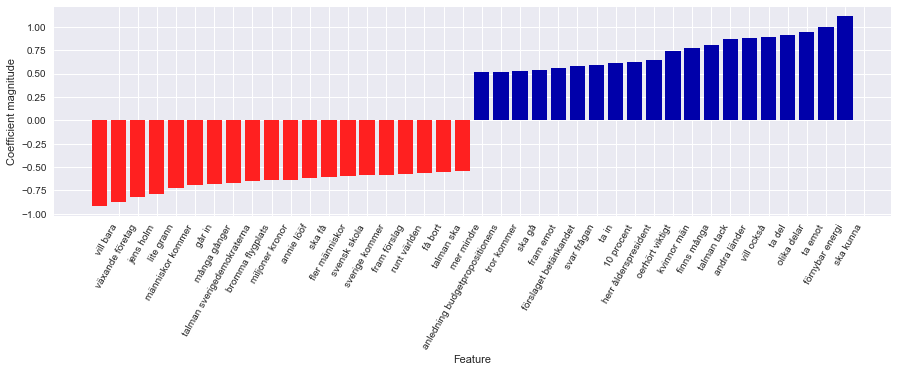

In [226]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mask = np.array([len(feature.split(" ")) for feature in feature_names]) ==2
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                    feature_names[mask], n_top_features=20)

In a final step, the model that gave the best accuracy score from the cross-validation, i.e. the model with single words and bigrams and the C parameter set to 1 in the logistic regression, is used to predict gender using the test data. This results in an accuracy score of 69 percent. This is about the same as from the model using onlys single words. Since the addition of bigrams makes the estimation more complex and demand more computational power, it could be argued that it is better to not include bigrams in the model. 

In [307]:
tfidf_vect2 = TfidfVectorizer(min_df=.01,
                            stop_words = stop,
                            ngram_range=(1,2))
tfidf_vect2.fit(X_train)
tfidf2 = tfidf_vect2.transform(X_train)
tfidf_test2 = tfidf_vect2.transform(X_test)
lr_tfidf2 = LogisticRegression(C=1)
lr_tfidf2.fit(tfidf2, y_train)
print accuracy_score(y_test, lr_tfidf2.predict(tfidf_test2))
print confusion_matrix(y_test, lr_tfidf2.predict(tfidf_test2))


0.68743509865
[[439 103]
 [198 223]]


## Conclusions
The purpose of the analysis presented here was to evaluate if it is possible to determine the gender of the MP by analyzing their speeches, without taking any other characteristics into account. This was conducted by analyzing speeches in the Swedish parliament during one year, from autumn 2014 to summer 2015. Even if different methods have been tried, the results have been about the same: in about 65-70 percent of the times the gender was correctly predicted from the speech given. This not so accurate, but it is clearly better than what would be the result of randomly guessing the gender of the MP's. It might be possible to improve the model by incorporating more years into the analysis. Another path would be to use information about party affiliation in the models. This would probably improve the prediction, but it would then answer a slightly different research question. 

As a part of the analysis, information about what words are most informative when it comes to determine gender from parliament speeches was retrieved. Since the model was not so accurate in predicting gender, this should be interpreted with caution. Furthermore, for many of the most informative words it was difficult to determine if they belong to any particular policy area.  Still, a few words were likely to be related to "soft" and "hard" policy issues. In this aspect, the results were in line with previous research that have found that women speak more about "soft" policy isses and men more about "hard" (Bäck et al. 2014). In order to analyse this in more detail, however, it would be better to estimate topic models and see if words that belong to "soft" and "hard" topics are used to different degrees among female and male MP's. 


## References
Bäck, H., Debus, M., & Müller, J. (2014). Who Takes the Parliamentary Floor? The Role of Gender in Speech-making in the Swedish Riksdag. *Political Research Quarterly*, 67(3), 504–518.

Grimmer, J., & Stewart, B. M. (2013). Text as Data: The Promise and Pitfalls of Automatic Content Analysis Methods for Political Texts. *Political Analysis*, 21(3), 267–297. 

Inter-parliamentary Union (IPU). (2015). Women in Parliaments: 20 years in review. 

King, G., Lam, P., & Roberts, M. E. (2017). Computer-Assisted Keyword and Document Set Discovery from Unstructured Text. *American Journal of Political Science*, n/a-n/a.

Mazur, A. G., & Pollack, M. A. (2009). Gender and Public Policy in Europe: An Introduction. *Comparative European Politics*, 7(1), 1–11. 

Quinn, K. M., Monroe, B. L., Colaresi, M., Crespin, M. H., & Radev, D. R. (2010). How to Analyze Political Attention with Minimal Assumptions and Costs. *American Journal of Political Science*, 54(1), 209–228.

Wängnerud, Lena. (1998). Politikens andra sida. Om kvinnorepresentation i Sveriges Riksdag. [The Other Side of Politics.
About Women’s Representation in the Swedish Riksdag] PhD diss., Göteborg University, Sweden.
